In [22]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [23]:
import pandas as pd

data = pd.read_csv('C:/Users/hyunj/Desktop/전주공모전자료/자동차등록현황/자동차_등록_현황_20220815195606.csv', encoding = 'CP949')
data.head()

,차종별,항목,2021.10,2021.10.1,2021.10.2,2016,2016.1,2016.2,2017,2017.1,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2
0,차종별,항목,전주시,완산구,덕진구,전주시,완산구,덕진구,전주시,완산구,덕진구,전주시,완산구,덕진구,전주시,완산구,덕진구,전주시,완산구,덕진구
1,계,계 (대),337952,157354,180598,296296,148995,147301,303580,152598,150982,315489,150426,165063,324152,151111,173041,334386,155805,178581
2,계,관 용 (대),1099,759,340,916,559,357,957,589,368,1013,595,418,1077,670,407,1095,718,377
3,계,자가용 (대),325755,152422,173333,283893,144426,139467,291237,147910,143327,302930,145773,157157,311490,146337,165153,321870,150873,170997
4,계,영업용 (대),11098,4173,6925,11487,4010,7477,11386,4099,7287,11546,4058,7488,11585,4104,7481,11421,4214,7207


In [24]:
data.columns

Index(['차종별', '항목', '2021.10', '2021.10.1', '2021.10.2', '2016', '2016.1',
       '2016.2', '2017', '2017.1', '2017.2', '2018', '2018.1', '2018.2',
       '2019', '2019.1', '2019.2', '2020', '2020.1', '2020.2'],
      dtype='object')

In [25]:
전주_year = ['2016', '2017', '2018', '2019', '2020', '2021.10']
완산_year = ['2016.1', '2017.1', '2018.1', '2019.1', '2020.1', '2021.10.1']
덕진_year = ['2016.2', '2017.2', '2018.2', '2019.2', '2020.2', '2021.10.2']

In [26]:
전주시 = []
완산구 = []
덕진구 = []

for year in 전주_year :
    전주시.append(data.loc[3, year])
for year in 완산_year :
    완산구.append(data.loc[3, year])
for year in 덕진_year :
    덕진구.append(data.loc[3, year])
            

In [27]:
전주시

['283893', '291237', '302930', '311490', '321870', '325755']

In [28]:
완산구

['144426', '147910', '145773', '146337', '150873', '152422']

In [29]:
덕진구

['139467', '143327', '157157', '165153', '170997', '173333']

In [30]:
# (올해의 값 - 작년의 값) / 작년의 값 *100
def Year_on_Year(list) :
    temp_list = []
    for i in range(len(list)-1) :
        rate = (float(list[i+1]) - float(list[i])) / float(list[i]) * 100
        rate = round(rate, 2)
        temp_list.append(rate)
    return temp_list
        

In [31]:
rate_전주 = Year_on_Year(전주시)
rate_완산 = Year_on_Year(완산구)
rate_덕진 = Year_on_Year(덕진구)

In [32]:
rate_전주

[2.59, 4.01, 2.83, 3.33, 1.21]

In [33]:
rate_완산

[2.41, -1.44, 0.39, 3.1, 1.03]

In [34]:
rate_덕진

[2.77, 9.65, 5.09, 3.54, 1.37]

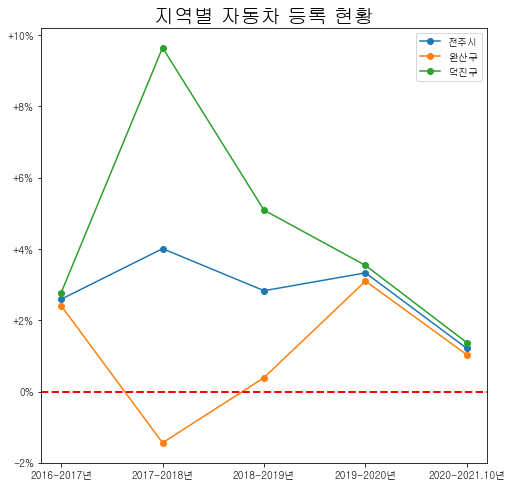

In [40]:
import matplotlib.pyplot as plt

x_axis = ['2016-2017년', '2017-2018년', '2018-2019년', '2019-2020년', '2020-2021.10년']
y_axis = ['-2%', '0%', '+2%', '+4%', '+6%', '+8%', '+10%']

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(x_axis,rate_전주,marker='o',label='전주시') ## 선그래프 생성
ax.plot(x_axis,rate_완산,marker='o',label='완산구') 
ax.plot(x_axis,rate_덕진,marker='o',label='덕진구') 
plt.axhline(y=0, color='r',linestyle='--', linewidth=2)
plt.yticks([-2,0,2,4,6,8,10], y_axis)
ax.legend() ## 범례
 
plt.title('지역별 자동차 등록 현황',fontsize=20) ## 타이틀 설정
plt.show()

In [41]:
import pandas as pd

df = pd.DataFrame({'전주시' : 전주시, '완산구' : 완산구, '덕진구' : 덕진구}, index = 전주_year)
df

,전주시,완산구,덕진구
2016,283893,144426,139467
2017,291237,147910,143327
2018,302930,145773,157157
2019,311490,146337,165153
2020,321870,150873,170997
2021.10,325755,152422,173333


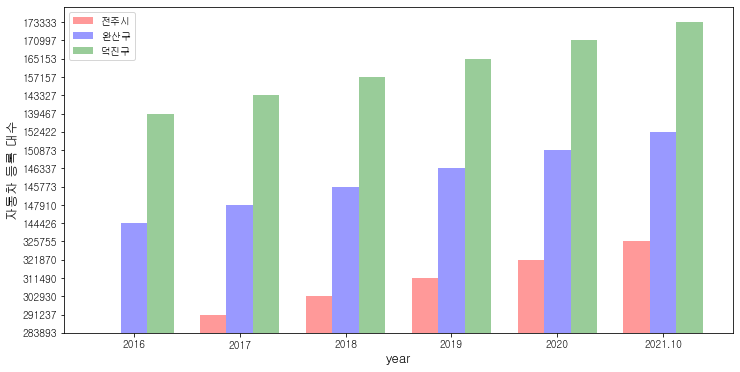

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

index = np.arange(6)

b1 = plt.bar(index, df['전주시'], bar_width, alpha=0.4, color='red', label='전주시')

b2 = plt.bar(index + bar_width, df['완산구'], bar_width, alpha=0.4, color='blue', label='완산구')

b3 = plt.bar(index + 2 * bar_width, df['덕진구'], bar_width, alpha=0.4, color='green', label='덕진구')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 6 + bar_width, 1), 전주_year)
# x축, y축 이름 및 범례 설정
plt.xlabel('year', size = 13)
plt.ylabel('자동차 등록 대수', size = 13)
plt.legend()
plt.show()

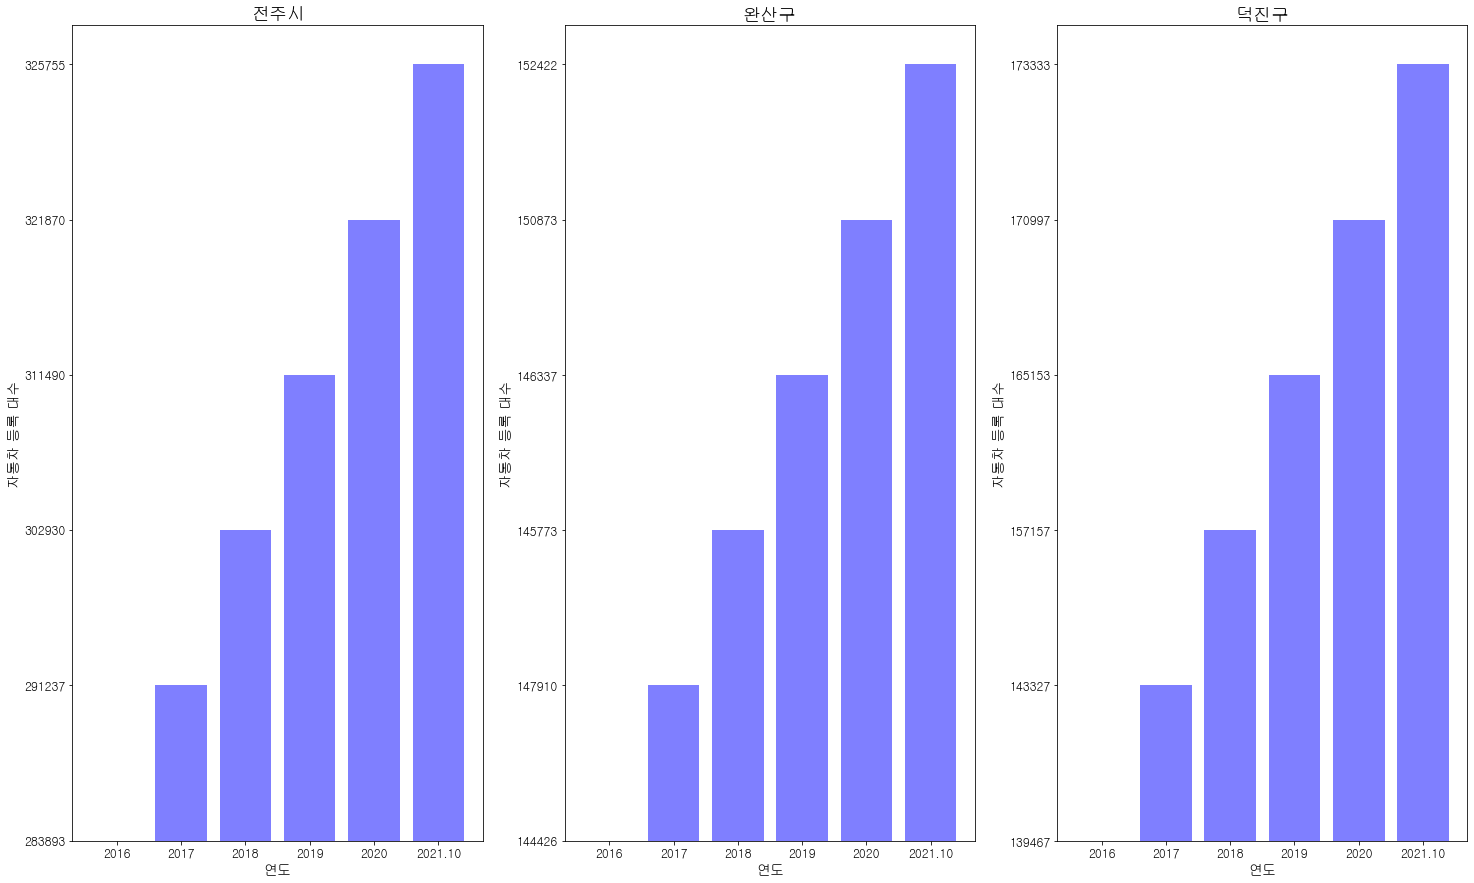

In [79]:
# (1-1) multiple bar plots with different y axis scale
plt.rcParams['figure.figsize'] = [25, 15]
for i, group in enumerate(['전주시', '완산구', '덕진구']) :
    temp_df = df[group]
    plt.subplot(1, 3, i+1)
    plt.bar(temp_df.index, df[group], color='blue', alpha = 0.5)
    plt.title('%s' %group, fontsize=18)
    plt.xlabel('연도', fontsize=14)
    plt.ylabel('자동차 등록 대수', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    

In [80]:
max(df['전주시'])

'325755'